# Trading Strategy for Zoom
-----
Quantemental Investment

Danni Chen <br>
Master of Science in Finance, University of Illinois at Urbana-Champaign.

* https://www.linkedin.com/in/dannie-chen-dc/
    

In [ ]:
!pip install configparser
!pip install cufflinks
!pip install intrinio_sdk

**Configuration**

In [2]:
import intrinio_sdk
import configparser as cp

**Scientific Analysis**

In [3]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import cufflinks as cf 
import matplotlib.pyplot as plt
cf.set_config_file(offline=True)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



**Secure method to load API credentials**

In [4]:
cfg = cp.ConfigParser()
cfg.read('../resources/credentials.cfg')

['../resources/credentials.cfg']

**Connect to Intrinio API using your sandbox API key**

In [5]:
API_KEY = cfg['intrinio']['app_key']

intrinio_sdk.ApiClient().configuration.api_key['api_key'] = API_KEY

security_api = intrinio_sdk.SecurityApi()

**Intrinio API Request**

In [9]:
# Zoom
identifier_zm= 'ZM' 
start_date = '2019-10-01' 
end_date = '2020-05-08' 
frequency = 'daily' 
page_size = 200
next_page = ''

In [10]:
response_zm = security_api.get_security_stock_prices(identifier_zm,
                                                  start_date = start_date,
                                                  end_date = end_date,
                                                    page_size = 200)

In [11]:
response_zm.stock_prices[-1]

{'adj_close': 75.81,
 'adj_high': 77.49,
 'adj_low': 75.21,
 'adj_open': 76.43,
 'adj_volume': 1384716.0,
 'close': 75.81,
 'date': datetime.date(2019, 10, 1),
 'frequency': 'daily',
 'high': 77.49,
 'intraperiod': False,
 'low': 75.21,
 'open': 76.43,
 'volume': 1384716.0}

In [12]:
response_zm.security

{'code': 'EQS',
 'company_id': 'com_yKNr8z',
 'composite_figi': 'BBG0042V6JM8',
 'composite_ticker': 'ZM:US',
 'currency': 'USD',
 'figi': 'BBG00NTY6FH5',
 'id': 'sec_zqpQ4p',
 'name': 'Zoom Video Communications Inc',
 'share_class_figi': 'BBG0042V6JN7',
 'ticker': 'ZM'}

**Data Cleaning**

In [13]:
zoom_stock = [p.to_dict() for p in response_zm.stock_prices]
zoom_df = pd.DataFrame.from_dict(zoom_stock)

In [14]:
zoom_df['secid'] = "Zoom"
zoom_df.index = pd.DatetimeIndex(zoom_df['date'])
zoom_df = zoom_df.drop('date',axis=1)
zoom_df = zoom_df.sort_index()
zoom_df.shape

(152, 13)

In [15]:
zoom_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2019-10-01,75.81,77.4900,75.21,76.43,1384716.0,75.81,daily,77.4900,False,75.21,76.43,1384716.0,Zoom
2019-10-02,73.85,75.7800,73.66,74.50,1388979.0,73.85,daily,75.7800,False,73.66,74.50,1388979.0,Zoom
2019-10-03,76.83,78.4897,73.39,73.90,2607615.0,76.83,daily,78.4897,False,73.39,73.90,2607615.0,Zoom
2019-10-04,76.53,77.7831,75.28,77.00,1799740.0,76.53,daily,77.7831,False,75.28,77.00,1799740.0,Zoom
2019-10-07,76.99,77.4300,75.00,76.99,1432473.0,76.99,daily,77.4300,False,75.00,76.99,1432473.0,Zoom


In [16]:
zoom_df.tail()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid
date,,,,,,,,,,,,,
2020-05-01,138.56,141.63,132.6700,136.00,13806992.0,138.56,daily,141.63,False,132.6700,136.00,13806992.0,Zoom
2020-05-04,143.44,144.98,140.4495,140.77,9184748.0,143.44,daily,144.98,False,140.4495,140.77,9184748.0,Zoom
2020-05-05,144.82,148.44,140.8600,144.43,7376349.0,144.82,daily,148.44,False,140.8600,144.43,7376349.0,Zoom
2020-05-06,149.59,150.74,144.0900,145.47,6031085.0,149.59,daily,150.74,False,144.0900,145.47,6031085.0,Zoom
2020-05-07,157.80,162.00,154.0400,154.84,8260764.0,157.80,daily,162.00,False,154.0400,154.84,8388863.0,Zoom


<a id='commonanalyses'></a>
## Common Financial Analyses

**Calculate Returns**

In [17]:
returns = np.log(zoom_df['adj_close'] / zoom_df['adj_close'].shift(1))
zoom_df['returns'] = returns
zoom_df.head()

,adj_close,adj_high,adj_low,adj_open,adj_volume,close,frequency,high,intraperiod,low,open,volume,secid,returns
date,,,,,,,,,,,,,,
2019-10-01,75.81,77.4900,75.21,76.43,1384716.0,75.81,daily,77.4900,False,75.21,76.43,1384716.0,Zoom,NaN
2019-10-02,73.85,75.7800,73.66,74.50,1388979.0,73.85,daily,75.7800,False,73.66,74.50,1388979.0,Zoom,-0.026194
2019-10-03,76.83,78.4897,73.39,73.90,2607615.0,76.83,daily,78.4897,False,73.39,73.90,2607615.0,Zoom,0.039559
2019-10-04,76.53,77.7831,75.28,77.00,1799740.0,76.53,daily,77.7831,False,75.28,77.00,1799740.0,Zoom,-0.003912
2019-10-07,76.99,77.4300,75.00,76.99,1432473.0,76.99,daily,77.4300,False,75.00,76.99,1432473.0,Zoom,0.005993


In [ ]:
zoom_df.tail()

In [18]:
# Zoom Stock Returns
zoom_returns = zoom_df['returns']
zoom_returns.tail()

date
2020-05-01    0.024770
2020-05-04    0.034613
2020-05-05    0.009575
2020-05-06    0.032407
2020-05-07    0.053430
Name: returns, dtype: float64

In [161]:
zoom_returns.shape

(152,)

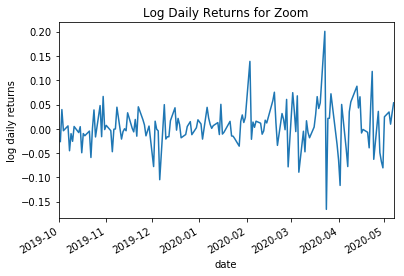

In [20]:
zoom_returns.plot()
plt.title("Log Daily Returns for Zoom")
plt.xlabel("date")
plt.ylabel("log daily returns")
plt.show()

### Plot the 152 days daily returns for Zoom

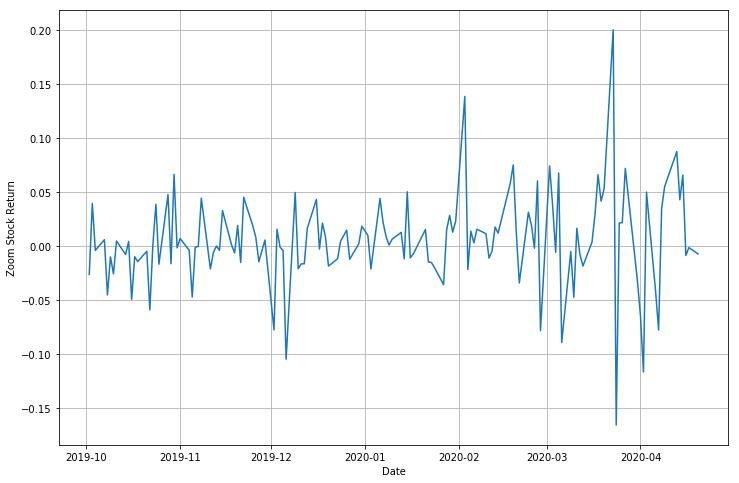

In [93]:
plt.figure(figsize=(12,8))
plt.plot(zoom_returns)

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.grid(True)
plt.axis('tight')
plt.xlabel("Date")
plt.ylabel("Zoom Stock Return")
plt.title("Log Daily Returns for Zoom")

plt.show()

### Plot Zoom stock 30 day windows average return

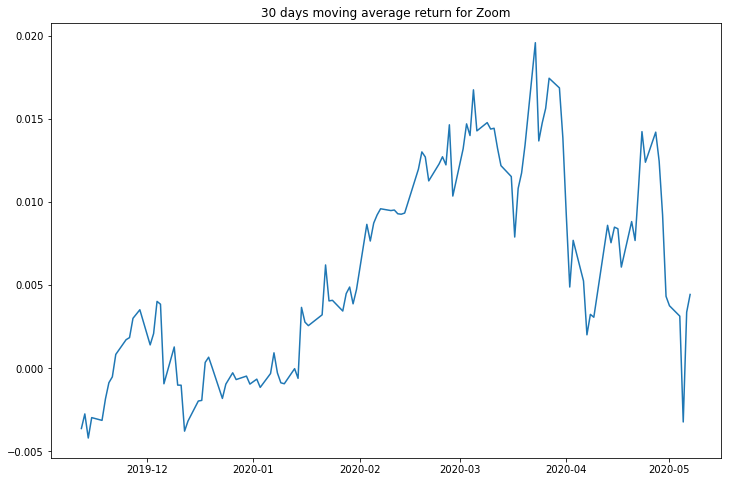

In [21]:
plt.figure(figsize=(12,8))
return_30days = pd.DataFrame(zoom_returns.rolling(window=30).mean())
plt.plot(return_30days)
plt.title("30 days moving average return for Zoom")
plt.show()

In [22]:
return_30days.tail()

,returns
date,
2020-05-01,0.003763
2020-05-04,0.003139
2020-05-05,-0.003231
2020-05-06,0.003376
2020-05-07,0.004443


### Plot Zoom stock 5 day windows average return

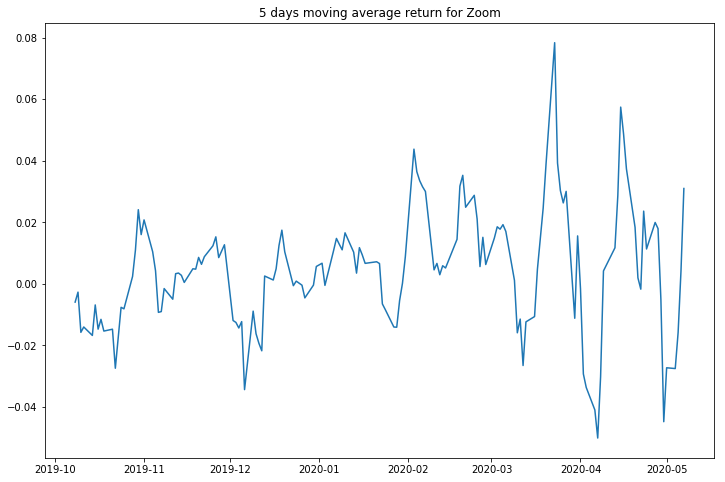

In [23]:
plt.figure(figsize=(12,8))
return_5days = pd.DataFrame(zoom_returns.rolling(window=5).mean())
plt.plot(return_5days)
plt.title("5 days moving average return for Zoom")
plt.show()

<a id='tradingstrategy'></a>
## Trading Strategy For Zoom

**Established short and long windows parameters based on the number of observations**

In [24]:
win2 = 2
win5 = 5
win8 = 8
win10 = 10
win12 = 12
win15 = 15
win20 = 20
windows = [2, 5, 8, 10, 12, 15, 20]

In [46]:
sma2 = zoom_df['close'].rolling(window = 2, min_periods = 1,center = False).mean()
sma5 = zoom_df['close'].rolling(window = 5, min_periods = 1,center = False).mean()
sma8 = zoom_df['close'].rolling(window = 8, min_periods = 1,center = False).mean()
sma10 = zoom_df['close'].rolling(window = 10, min_periods = 1,center = False).mean()
sma12 = zoom_df['close'].rolling(window = 12, min_periods = 1,center = False).mean()
sma15 = zoom_df['close'].rolling(window = 15, min_periods = 1,center = False).mean()
sma20 = zoom_df['close'].rolling(window = 20, min_periods = 1,center = False).mean()

smas = {'sma2': sma2, 'sma5': sma5, 'sma8': sma8, 'sma10': sma10, 'sma12': sma12, 'sma15': sma15, 'sma20': sma20}

In [55]:
column_names = ["sma2", "sma5", "sma8", "sma10", "sma12", "sma15", "sma20"]
score_system = pd.DataFrame(index=zoom_df.index, columns = column_names).fillna(0)
for idx, column in enumerate(column_names):
    for idx2, other in enumerate(column_names):
        if idx - 1 == idx2 or idx + 1 == idx2:
            score_system.loc[smas[column] > smas[other], column] += 1
score_system.tail()

,sma2,sma5,sma8,sma10,sma12,sma15,sma20
date,,,,,,,
2020-05-01,0,1,2,1,1,1,0
2020-05-04,0,1,2,1,1,1,0
2020-05-05,1,0,1,2,0,2,0
2020-05-06,1,0,1,2,1,1,0
2020-05-07,1,1,0,1,2,1,0


In [111]:
score = pd.DataFrame(score_system.sum())
score.columns = ['total score']
score

,total score
sma2,89
sma5,153
sma8,149
sma10,148
sma12,145
sma15,140
sma20,36


In [120]:
short_win_score = score.min()
long_win_score = score.max()
window_chosen = pd.concat([short_win_score, long_win_score], axis=1)
window_chosen.columns = ['Max: sma20', 'Min: sma5']
window_chosen

,Max: sma20,Min: sma5
total score,36,153


In [121]:
short_window = 5
long_window = 20

**Empty `signals` DataFrame with a `signal` column starting at zero**

In [122]:
signals = pd.DataFrame(index = zoom_df.index)
signals['signal'] = 0.0

In [123]:
#Short Window = 20, Long Window = 5

**Simple moving average over the short window and the long window**

In [124]:
signals['short_mavg'] =zoom_df['close'].rolling(window = short_window,
                                                 min_periods = 1,
                                                 center = False).mean()
signals['long_mavg'] = zoom_df['close'].rolling(window = long_window,
                                                min_periods = 1,
                                                center = False).mean()

**Determine Trading signal**

In [125]:
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:],
                                            1.0, 0.0)

**Create Trading Orders**

In [126]:
signals['positions'] = signals['signal'].diff()
signals['positions'][0] = 1
signals.head(10)

,signal,short_mavg,long_mavg,positions
date,,,,
2019-10-01,0.0,75.810000,75.810000,1.0
2019-10-02,0.0,74.830000,74.830000,0.0
2019-10-03,0.0,75.496667,75.496667,0.0
2019-10-04,0.0,75.755000,75.755000,0.0
2019-10-07,0.0,76.002000,76.002000,0.0
2019-10-08,0.0,75.558000,75.600000,0.0
2019-10-09,1.0,75.360000,75.208571,1.0
2019-10-10,0.0,74.196000,74.683750,-1.0
2019-10-11,0.0,73.160000,74.313333,0.0


**Trading strategy and signals for a 5 day short and 20 day long strategy**

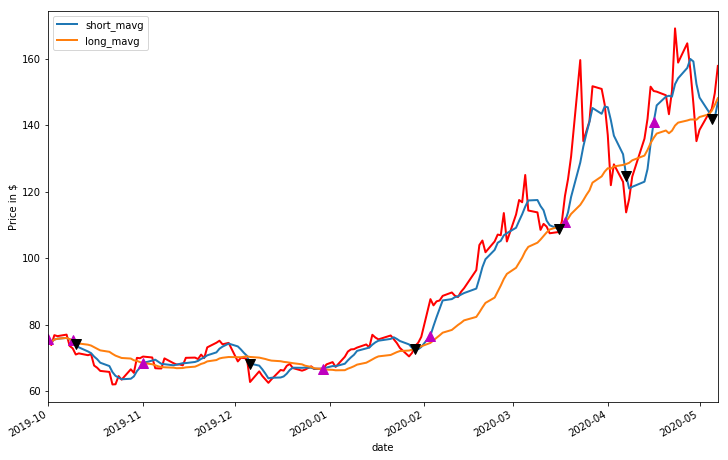

In [127]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,8))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
zoom_df['close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting 


**Assume we have only $10000 initial capital to invest**

In [128]:
initial_capital= float(10000.0)

**Empty dataFrame to hold the positions**

In [129]:
positions = pd.DataFrame(index = signals.index).fillna(0.0)

**Make a Buy order of 72 shares ** <br> (the share number is determined by making sure there is no negative number in the cash column in the table below)

In [148]:
positions['Zoom'] = 72 * signals['signal']

**Initialize portfolio with value owned**

In [149]:
portfolio = pd.DataFrame(index = positions.index).fillna(0.0)

**Keep track of the owned shares**

In [150]:
pos_diff = positions.diff()
pos_diff['Zoom'][0]=0
pos_diff.head(10)

,Zoom
date,
2019-10-01,0.0
2019-10-02,0.0
2019-10-03,0.0
2019-10-04,0.0
2019-10-07,0.0
2019-10-08,0.0
2019-10-09,72.0
2019-10-10,-72.0
2019-10-11,0.0


**Add `holdings` to portfolio**

In [151]:
portfolio['holdings'] = positions.multiply(zoom_df['adj_close'], axis=0)

**Calculate remainder `cash` on portfolio**

In [152]:
portfolio['cash'] = initial_capital - (pos_diff.multiply(zoom_df['adj_close'], 
                                                         axis=0)).sum(axis=1).cumsum()   

**Create a `total` portfolio value column**

In [ ]:
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

**Create a portfolio `returns` column**

In [154]:
portfolio['returns'] = portfolio['total'].pct_change()
portfolio['returns'][0]=0

In [155]:
portfolio['signal'] = [ 'short' if i == 0 else 'long' for i in signals['signal']]

In [185]:
portfolio.tail()

,holdings,cash,total,returns,signal
date,,,,,
2020-05-01,9976.32,83.44,10059.76,0.024866,long
2020-05-04,10327.68,83.44,10411.12,0.034927,long
2020-05-05,0.00,10510.48,10510.48,0.009544,short
2020-05-06,0.00,10510.48,10510.48,0.000000,short
2020-05-07,0.00,10510.48,10510.48,0.000000,short


**Strategy and signals for a 2 day short and 8 day long Portfolio**

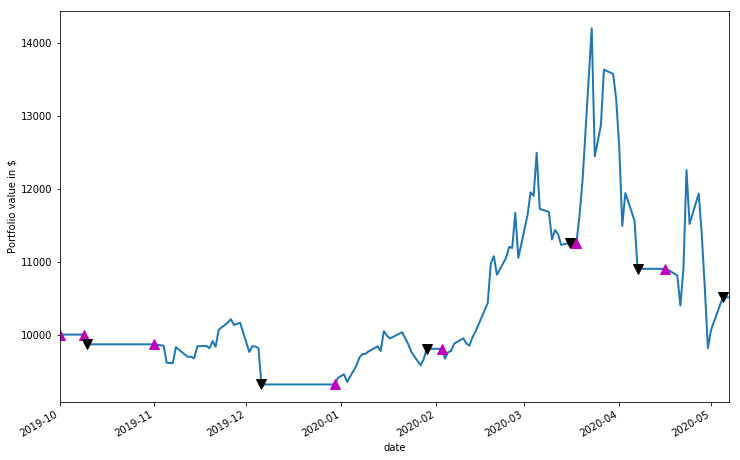

In [157]:
# Initialize the plot figure
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating The Trading Strategy

### Sharpe Ratio
**For 152 Trading days**

In [162]:
# 152 Days Sharpe ratio
returns = portfolio['returns']
sharpe_ratio_152 = np.sqrt(152) * (returns.mean() / returns.std())
print(sharpe_ratio_152)

0.3166297965510184


In [163]:
# Annualized Sharpe ratio (252 trading days)
sharpe_ratio_252 = np.sqrt(252) * (returns.mean() / returns.std())
print(sharpe_ratio_252)

0.4076901870689562


**Portfolio 152 trading days Sharpe Ratio: 0.3166297965510184**

**Annually Portfolio Sharpe Ratio: 0.4076901870689562**

#### The typical Sharpe ratio of an actively managed mutual fund is about 0.25. So our portfolio has a relatively high sharpe ratio over this level.

https://seekingalpha.com/article/4239442-your-sharpe-ratio-is-low-for-reasons-bad-golf

### Maximum Drawdown
https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp

In [164]:
# Define a trailing 12 trading day window
max_window = 12

In [165]:
# Calculate the max drawdown in the past window days for each day
rolling_max = zoom_df['adj_close'].rolling(max_window, min_periods=1).max()
daily_drawdown = zoom_df['adj_close']/rolling_max - 1.0

In [166]:
# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(max_window, min_periods=1).min()

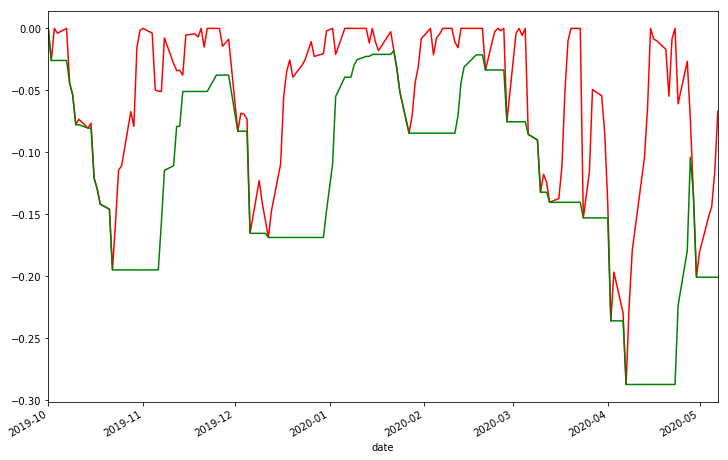

In [167]:
fig = plt.figure(figsize=(12,8))

# Plot the results
daily_drawdown.plot(color="r")
max_daily_drawdown.plot(color="g")

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

**What CAGR Can Tell You**

The compound annual growth rate isn't a true return rate, but rather a representational figure. It is essentially a number that describes the rate at which an investment would have grown if it had grown the same rate every year and the profits were reinvested at the end of each year. 

https://www.investopedia.com/terms/c/cagr.asp

**Calculate the CAGR**

In [168]:
days = (zoom_df.index[-1] - zoom_df.index[0]).days

cagr_ms = ((((zoom_df['adj_close'][-1]) / zoom_df['adj_close'][1])) ** (365.0/days)) - 1

print(cagr_ms)

2.544819820760301


<a id='backtrader'></a>

### Backtrader 

* https://www.backtrader.com/

**Strategy Overview**

Given current market conditions and increase in volatility we may be able to take advantage of a simple short/long strategy with the following entry and exit parameters:
 
**Entry**

* When 2 day moving average greater than 8 day moving average buy

**Exit**

* When 8 day moving average greater than 2 day moving average sell

**Trade Management and Position Sizing**

* One open position either buy or sell at a given time.
* Position size buy/sell 77 shares at a time without 
* Backtrader will reject order if not enough funds

In [169]:
!pip install backtrader

     |████████████████████████████████| 419kB 2.0MB/s eta 0:00:01     |████████████▊                   | 163kB 2.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [172]:
import backtrader as bt

In [173]:
zoom_data = zoom_df[['open', 'high', 'low', 'close', 'volume']]
zoom_data.index = pd.DatetimeIndex(zoom_data.index)
zoom_data.head()

,open,high,low,close,volume
date,,,,,
2019-10-01,76.43,77.4900,75.21,75.81,1384716.0
2019-10-02,74.50,75.7800,73.66,73.85,1388979.0
2019-10-03,73.90,78.4897,73.39,76.83,2607615.0
2019-10-04,77.00,77.7831,75.28,76.53,1799740.0
2019-10-07,76.99,77.4300,75.00,76.99,1432473.0


In [174]:
zoom_data.to_csv("../data/zoom_data.csv")

**Backtrader Strategy Class**

In [176]:
class SMAStrategy(bt.Strategy):
    
    def __init__(self):
        signal_short = bt.ind.SMA(period = 5)
        signal_long = bt.ind.SMA(period = 20)
        self.sma_diff = signal_short - signal_long

    def next(self):
        if not self.position:
            if self.sma_diff >= 0:
                self.buy(size = 72)
        else:
            if self.sma_diff < 0:
                self.sell(size = 72)

**Backtrader Start**

In [177]:
cerebro = bt.Cerebro()
cerebro.addstrategy(SMAStrategy)

0

In [178]:
# Pass it to the backtrader datafeed and add it to the cerebro
data = bt.feeds.PandasData(dataname = zoom_data)

#Add the data to Cerebro
cerebro.adddata(data)

In [179]:
startcash=10000
cerebro.broker.setcash(startcash)
cerebro.broker.setcommission(commission = 0)

In [180]:
cerebro.run()

## Zoom Final Portfolio Value


In [181]:
zoom_portfolio_value = cerebro.broker.getvalue()
print('Final Portfolio Value: ${}'.format(zoom_portfolio_value))

Final Portfolio Value: $11161.359999999999


In [182]:
zoom_pnl = zoom_portfolio_value - startcash
print('P/L: ${}'.format(zoom_pnl))

P/L: $1161.3599999999988


### Backtrader Visualization

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/backtrader/plot/__init__.py:30: UserWarning:


This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/nbuser/anaconda3_420/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/nbuser/anaconda3_420/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/kern

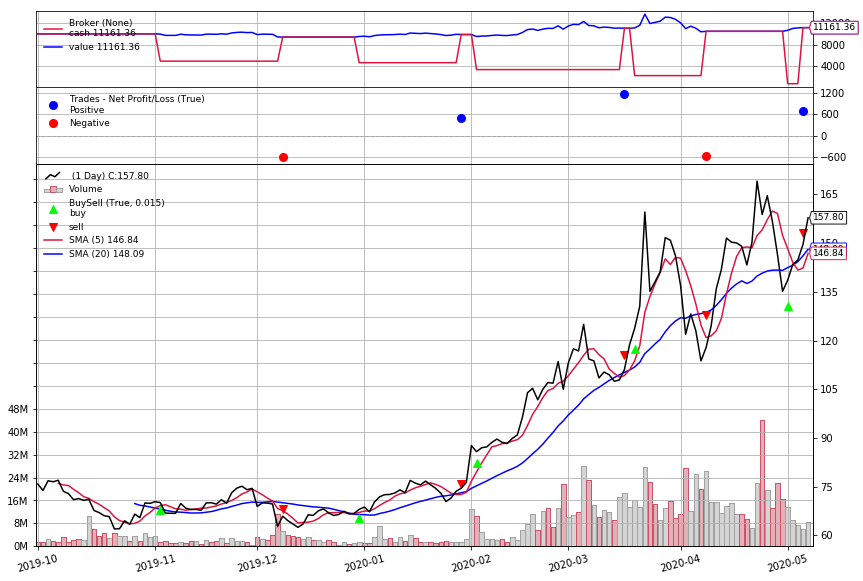

[[<matplotlib.figure.Figure at 0x7f60aa9c8e48>]]

In [183]:
plt.rcParams['figure.figsize'] = [12, 8]
cerebro.plot()